# Capstone Project - The Battle of Neighberhoods

## Final Report - Week 1-2

### 1.Discussion of the background

#### Myeongdong is most famous place in Korea. Korea's financial hub is divided between here and Yeouido where the Korea Stock Exchange is located. Major insurance, securities, financial services companies, and investment firms with headquarters in Myeongdong include Citibank, SK Corporation, Kookmin Bank, Korea Exchange Bank, Lone Star Funds, Sumitomo Mitsui Banking Corporation, AIG Korea Insurance, Hana Bank, and HSBC. The Bank of Korea is also in the vicinity.
#### Myeongdong is one of Seoul's main shopping districts featuring mid-to-high priced retail stores and international brand outlets, including Lacoste, Polo Ralph Lauren, H&M, Zara, Forever 21, Bulgari and Louis Vuitton, as well as Korean cosmetics brands such as Nature Republic, Missha, The Face Shop and Skin Food. It is a particularly popular area for young people and tourists as a center for fashion and sight-seeing.[1] Several large shopping centers and department stores are in the district including Lotte Department Store, Shinsegae Department Store, Migliore, M Plaza, and Noon Square.
#### Myeongdong Festival has been hosted since 1982 to vitalize the commercial area and encourage tourism. It is usually held twice a year: from the end of March to the middle of April in spring, and the month of September in autumn. Parades, music and dance performances, fashion shows and other spectacles are part of the festivities. Many shops and stores offer product sales and discounts during this time as well.In 2012, the area hosted the street parade of the Cheonan World Dance Festival in October.

### 2. Purpose of this project

#### *. Display 10 shopping malls near the center of Myeong-dong.
#### *. Display the location of the mall on the map of the Myeongdong area and indicate the distribution of the mall on the map.
#### *. Cluster the mall by using clustering method.
#### *. Classify Myeongdong area malls according to items and graph 10 items with high frequency of malls.

### 3. A description of the data and how it will be used to solve the problem

#### My daughter's favorite place is 'Myeong-dong' in Korea. There are many shops and entertainment place in there. I use Foursquare to identify the venues around the area of residence which are then shown in the Seoul map and execution. 

#### In order to make a good explain about stores in 'Myeong-dong', the following data is required: Geodata (latitude and longitude) about Myeong-dong. List/Information about the stores information in Myeong-dong with geodata. I got a Geodata with Geolocator from Nominatim Pakage and then I download List/Information data about stores in Myeong-dong by connecting to Foursquare Web. with My client ID and Secret.

### 4. Interested Audience

#### I believe this is a relevant project for a person or entity interesting K-POP and planning to visit Korea. The use of FourSquare data and mapping data combined with data analysis will help get the key information.

In [42]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [43]:
# Seoul Korea
address = 'Myeong-dong, Seoul'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seoul is {}, {}.'.format(latitude, longitude))

C:\Users\gigan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Seoul is 37.5608977, 126.9863762.


In [44]:
neighborhood_latitude=37.5608977
neighborhood_longitude=126.9863762

In [45]:
# @hidden_cell
CLIENT_ID = 'UEQ0OFXJE4WB2LGR3GXV5WIPAG1GYPPR4MKX5NYOHDZWBSCY' # your Foursquare ID
CLIENT_SECRET = 'WSPUPRZOYKEZJRNKDQLFSAHXVMIDLLCIWXHC5JWLHUPTUO1Q' # your Foursquare Secret
VERSION = '20200319' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [46]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=UEQ0OFXJE4WB2LGR3GXV5WIPAG1GYPPR4MKX5NYOHDZWBSCY&client_secret=WSPUPRZOYKEZJRNKDQLFSAHXVMIDLLCIWXHC5JWLHUPTUO1Q&v=20200319&ll=37.5608977,126.9863762&radius=1000&limit=500'

In [47]:
# results display is hidden for report simplification 
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e74c047216785001b2d8895'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Myeong-dong',
  'headerFullLocation': 'Myeong-dong, Seoul',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 242,
  'suggestedBounds': {'ne': {'lat': 37.56989770900001,
    'lng': 126.99770853068785},
   'sw': {'lat': 37.551897690999986, 'lng': 126.97504386931215}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b85ddd8f964a520ff7631e3',
       'name': 'Myeongdong Kyoja (명동교자)',
       'location': {'address': '중구 명동10길 29',
        'crossStreet': '본점',
        'lat': 37.562455496971396,
        'lng': 126.9855300139797,
        'labeledLatLngs': [{'labe

In [48]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [49]:
venues = results['response']['groups'][0]['items']
Seoulnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Seoulnearby_venues =Seoulnearby_venues.loc[:, filtered_columns]
# filter the category for each row
Seoulnearby_venues['venue.categories'] = Seoulnearby_venues.apply(get_category_type, axis=1)
# clean columns
Seoulnearby_venues.columns = [col.split(".")[-1] for col in Seoulnearby_venues.columns]

Seoulnearby_venues.shape

(100, 4)

### 5. Result

#### - It shows information about 10 shopping malls near the center of Myeong-dong.
#### - It shows Map the location of the mall on the map of the Myeongdong area and indicate the distribution of the mall on the map.
#### - It shows the clustering the mall by using clustering method.
#### - Classify malls in Myeongdong area and graph 10 items with high frequency of malls.

In [50]:
Seoulnearby_venues.head(10)

,name,categories,lat,lng
0,Myeongdong Kyoja (명동교자),Noodle House,37.562455,126.985530
1,LINE FRIENDS (라인프렌즈),Souvenir Shop,37.561358,126.984470
2,Hotel Skypark Myeongdong III (호텔스카이파크),Hotel,37.561113,126.987151
3,GONG CHA (공차),Bubble Tea Shop,37.560800,126.984222
4,[아디다스 러닝] 아디다스 명동 플래그쉽 스토어,Athletics & Sports,37.561959,126.984947
5,Tous les Jours (뚜레쥬르),Bakery,37.560995,126.986049
6,PARIS BAGUETTE (파리바게뜨),Bakery,37.560883,126.984854
7,Å LAND,Clothing Store,37.562055,126.984446
8,STYLENANDA PINK HOTEL (스타일난다 핑크호텔),Clothing Store,37.562111,126.985271
9,ETUDE HOUSE (에뛰드하우스),Cosmetics Shop,37.562078,126.984977


In [51]:
map_sg = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=15)
# add markers to map
for lat, lng, label in zip(Seoulnearby_venues['lat'], Seoulnearby_venues['lng'], Seoulnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=3,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_sg)  
    
map_sg

In [52]:
# create map of Singapore place  using latitude and longitude values
map_sg = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=15, tiles='Stamen Terrain')
# add markers to map
for lat, lng, label in zip(Seoulnearby_venues['lat'], Seoulnearby_venues['lng'], Seoulnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=6,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_sg)  
    
map_sg

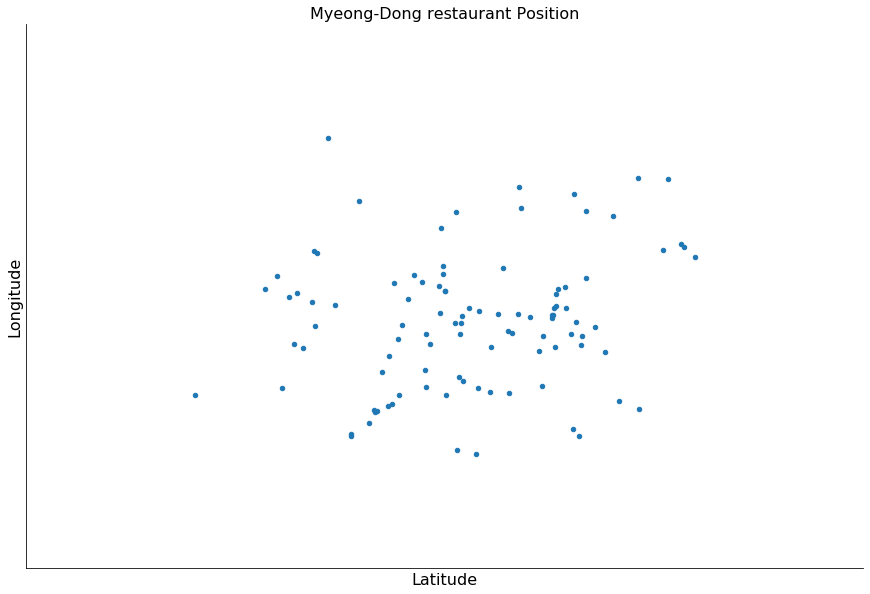

In [53]:
import matplotlib.pyplot as plt

X = Seoulnearby_venues[['lat', 'lng']]

scatter_plot = X.plot.scatter(x='lat', 
               y='lng',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Longitude', fontsize=16)
scatter_plot.set_title('Myeong-Dong restaurant Position', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

In [54]:
Seoulnearby_venues_cluster = Seoulnearby_venues.drop(['name','categories'], axis=1)

In [55]:
from sklearn.preprocessing import StandardScaler
X = Seoulnearby_venues_cluster.values[:,0:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.08661455,  0.159701  ],
       [-0.41008498, -0.1836088 ],
       [-0.52098839,  0.68470668],
       [-0.66258114, -0.26376271],
       [-0.13821198, -0.02901264],
       [-0.57434376,  0.32785247],
       [-0.62490325, -0.0593678 ],
       [-0.09465108, -0.19138584],
       [-0.06947265,  0.07567737],
       [-0.08427641, -0.01932291],
       [-1.78940766,  0.67432446],
       [ 0.7604316 ,  0.0464371 ],
       [ 0.64444754, -0.43703928],
       [-0.27632332,  0.12754193],
       [-1.46753833,  0.29412073],
       [-1.43595544, -0.06737862],
       [ 0.79764044,  0.41526937],
       [-1.41546277,  1.01849531],
       [ 1.07247241,  0.64215892],
       [-0.44093664,  0.58126238],
       [ 0.55388019,  0.06369534],
       [-1.8973399 ,  0.47771789],
       [ 0.76512926,  0.09819263],
       [-0.01155419,  0.19441393],
       [ 0.30841353,  0.79656442],
       [ 0.88519593,  0.51591827],
       [ 0.7680578 ,  0.09267069],
       [-0.25158916,  0.70135109],
       [-1.635303  ,

In [56]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 1 2
 2 0 2 2 1 2 0 2 1 2 0 2 0 2 2 1 2 2 2 1 2 2 0 1 2 1 2 1 1 2 1 1 2 1 0 0 2
 1 2 1 1 1 1 1 0 0 1 2 1 0 0 2 1 0 0 1 1 2 1 1 0 2 0]


In [57]:
Seoulnearby_venues_cluster["cluster"] = labels
Seoulnearby_venues_cluster.groupby('cluster').mean()

,lat,lng
cluster,,
0,37.564146,126.990168
1,37.561378,126.981441
2,37.562234,126.985599


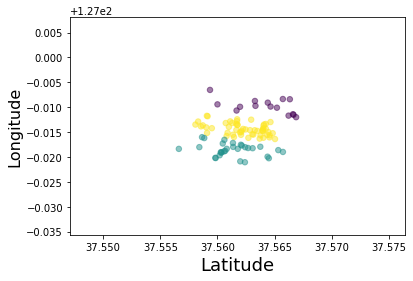

In [58]:
area = 30  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)

plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=16)
plt.show()

In [59]:
SN = Seoulnearby_venues.groupby('categories')[["name"]].count()
SN.sort_values(['name'], ascending = False, axis = 0, inplace = True)
SN_top10 = SN.head(10)
SN_top10

,name
categories,
Hotel,15
Korean Restaurant,11
Chinese Restaurant,6
Café,5
Coffee Shop,5
Bakery,4
Theater,4
Cosmetics Shop,3
Clothing Store,3


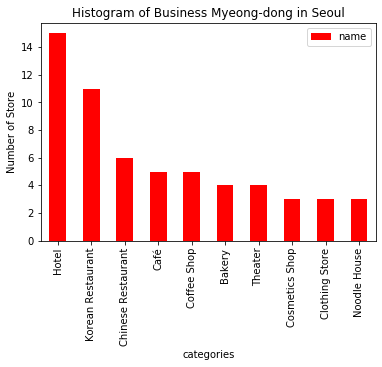

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

SN_top10.plot(kind='bar', color='red')

plt.title('Histogram of Business Myeong-dong in Seoul')
plt.ylabel('Number of Store')

plt.show()

### 6. Discussion

####  I can start data project by myself from now on. I feel this Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned. 
#### I have a good starting point to become a professional Data Scientist and I will continue exploring to creating many examples in my working place.

### 7. Conclusion

#### I am doing a simple data analysis example about Myeong-dong Mall area. I think the information will help for visitor about Myeong-dong area. This project has shown me a practical application to resolve a real situation by using Data Science tools. The mapping with Folium is a very powerful technique to consolidate information and make the analysis and decision thoroughly and with confidence. 
#### Furthermore, The analysis method will help to analyze more complicate data in real manufacruing process and make better analysis report.